In [8]:
# Importing the modules for collecting and building the dataset
import time
import os
import re

# Image processing...
from PIL import Image

# Labels of The Classes

In [9]:
cars = ['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada',
        'Lancia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi',
        'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat',
        'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']
football_clubs=['Barcelona', 'Real Madrid', 'Manchester United', 'Borussia Dortmund','Inter Milan', 'Chelsea']


In [10]:
# Importing standard ML set - numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Importing keras and its deep learning tools - neural network model, layers, contraints, optimizers, callbacks and utilities
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import RMSprop, SGD 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.regularizers import l2
from keras.initializers import RandomNormal, VarianceScaling

# Importing scikit-learn tools
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



# Path of The Dataset

In [11]:
# Setting up the image pool
#image_path = 'D:\College\ImageProcessing\projectCode\images\images/'
#imgs = os.listdir(image_path)
#img_x = img_y = 50 # image size is constant
#n_samples = np.size(imgs)
#n_samples # 20778 originally

image_path = 'D:\College\ImageProcessing\projectCode\images\Clubimages\images/'
images = os.listdir(image_path)
img_x = img_y = 224 # image size is constant
imgs=[]

for image in images:
    i=int(image.split('.')[0])
    imgs.append(i)
imgs=sorted(imgs)
imgs= [str(i) + ".jpg " for i in imgs ]
imgs[45]="46.png"
#print( imgs )

n_samples = np.size(imgs)
n_samples

300

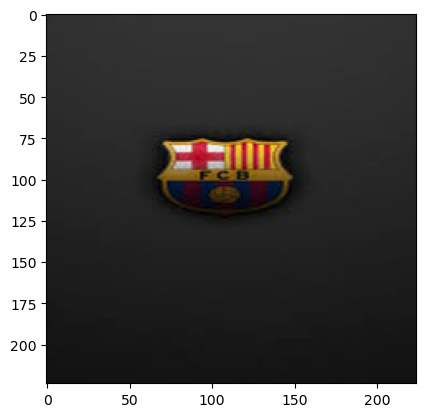

In [12]:
images = np.array([np.array(Image.open(image_path + img).convert("RGB")).flatten() for img in imgs], order='F', dtype='uint8')
np.shape(images)
plt.imshow(images[2].reshape(img_x, img_y, 3))
plt.show()

In [13]:
#labels = np.array([cars.index(re.match(r"(^\D+)", imgs[i])[0]) for i in range(n_samples)])
#labels.shape
labels=[]
           
for n in range(300):
            if n < 50:  #Barca
                labels.append(0)    
            elif n >= 50 and n < 100:
                labels.append(1)    #RMA
            elif n >= 100 and n < 150:
                labels.append(2)    #ManU
            elif n >= 150 and n < 200:
                labels.append(3)    #BVB
            elif n >= 200 and n < 250:
                labels.append(4)    #Inter
            else:
                labels.append(5) 

labels = np.array(labels)
labels.shape

(300,)

(300, 150528) (300,)


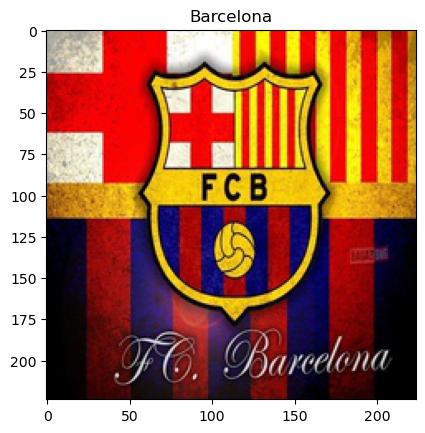

In [14]:

dataset, labelset = shuffle(images, labels, random_state=42) 
train_data = [dataset, labelset]

r = 5
print(train_data[0].shape, train_data[1].shape)
plt.imshow(images[r].reshape(img_x, img_y, 3))
plt.title(football_clubs[labels[r]])
plt.show()

In [15]:
# We have to prepare the dataset to fit into the CNN
X_train, X_test, y_train, y_test = train_test_split(train_data[0], train_data[1], test_size=0.2)

# we will maintain a copy of the test set, as we will do a couple of transformation to it
X_test_img = X_test.copy()


X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 3)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 3)


X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# some additional pre-processing, to zero-center the data...
X_train = np.subtract(X_train, 0.5)
X_test = np.subtract(X_test, 0.5)

# to scale it to (-1, 1)
X_train = np.multiply(X_train, 2.0)
X_test = np.multiply(X_test, 2.0)

# Labels have to be transformed to categorical
Y_train = np_utils.to_categorical(y_train, num_classes=len(football_clubs))
Y_test = np_utils.to_categorical(y_test, num_classes=len(football_clubs))

X_train.shape, X_test.shape

((240, 224, 224, 3), (60, 224, 224, 3))

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [17]:
datagen.fit(X_train)

In [18]:
# setting up batch size
batch = 128


n_classes = len(football_clubs)

# setting up the number of epochs to be trained
n_epochs = 200

# images are RGB, so they use up 3 channels for Red, Green and Blue, respectively
n_channels = 3
n_classes

6

In [77]:
model = Sequential()
model.add(Conv2D(32, (3,3),
                 input_shape=(img_x,img_y,n_channels),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))

# final activation is softmax, tuned to the number of classes/labels possible
model.add(Dense(len(football_clubs), activation='softmax'))

# Some callbacks have to be provided to choose the best trained model
early_stopping = EarlyStopping(patience=4, monitor='val_loss')
CNN_file = 'D:\College\ImageProcessing\projectCode/football.h5py' 
take_best_model = ModelCheckpoint(CNN_file,save_weights_only=True, save_best_only=True)

# optimizer will be a stochastic gradient descent, learning rate set at 0.005
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])


model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 256)      

In [78]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch, shuffle=True, seed=42),
                    steps_per_epoch=X_train.shape[0]//batch, epochs=n_epochs,
                    validation_data=(X_test, Y_test), workers=4,callbacks=[take_best_model])

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 3.9053 - categorical_accuracy: 0.1518 - val_loss: 16.5219 - val_categorical_accuracy: 0.1500
Epoch 2/200
1/1 [==============================] - 5s 5s/step - loss: 15.9310 - categorical_accuracy: 0.1797 - val_loss: 5.4259 - val_categorical_accuracy: 0.1500
Epoch 3/200
1/1 [==============================] - 4s 4s/step - loss: 5.4299 - categorical_accuracy: 0.2500 - val_loss: 2.7591 - val_categorical_accuracy: 0.2500
Epoch 4/200
1/1 [==============================] - 5s 5s/step - loss: 3.3212 - categorical_accuracy: 0.1719 - val_loss: 2.0590 - val_categorical_accuracy: 0.3333
Epoch 5/200
1/1 [==============================] - 4s 4s/step - loss: 2.2446 - categorical_accuracy: 0.2266 - val_loss: 1.9715 - val_categorical_accuracy: 0.2500
Epoch 6/200
1/1 [==============================] - 4s 4s/step - loss: 2.2039 - categorical_accuracy: 0.1875 - val_loss: 1.9230 - val_categorical_accuracy: 0.1667
Epoch 7/200
1/1 [=========

In [79]:

model.load_weights('D:\College\ImageProcessing\projectCode/football.h5py')

In [80]:
def ImageConvert(n, i):
    im_ex = i.reshape(n, img_x, img_y, 3)
    im_ex = im_ex.astype('float32') / 255
    im_ex = np.subtract(im_ex, 0.5)
    im_ex = np.multiply(im_ex, 2.0)
    return im_ex

In [83]:
def ShowCase(cols, rows):
    fdict = {'fontsize': 24,
            'fontweight' : 'normal',
            'verticalalignment': 'baseline'}
    plt.figure(figsize=(cols * 5, rows * 4))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    c = 0
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        
        # r - randomly picked from the whole dataset
        r = np.random.randint(np.shape(images)[0])
        
        # j - predicted class for the image of index r 
        j = int(model.predict_classes(ImageConvert(1, images[r:r+1]), verbose=0))
        
        # increase success if predicted well
        if labels[r] == j:
            c += 1
        
        # image needs reshaping back 
        plt.imshow(images[r].reshape(img_x, img_y, 3))
        
        # plt.title will show the true brand and the predicted brand
        plt.title('True brand: '+football_clubs[labels[r]]+'\nPredicted: '+football_clubs[j],
                  color= 'Green' if football_clubs[labels[r]] == football_clubs[j] else 'Red', fontdict=fdict) # Green for right, Red for wrong
        
        
        plt.xticks(())
        plt.yticks(())
        
    # print out the success rate
    print('Success rate: {}/{} ({:.2%})'.format(c, rows*cols, c/(rows*cols)))
    
    plt.show()

Success rate: 41/50 (82.00%)


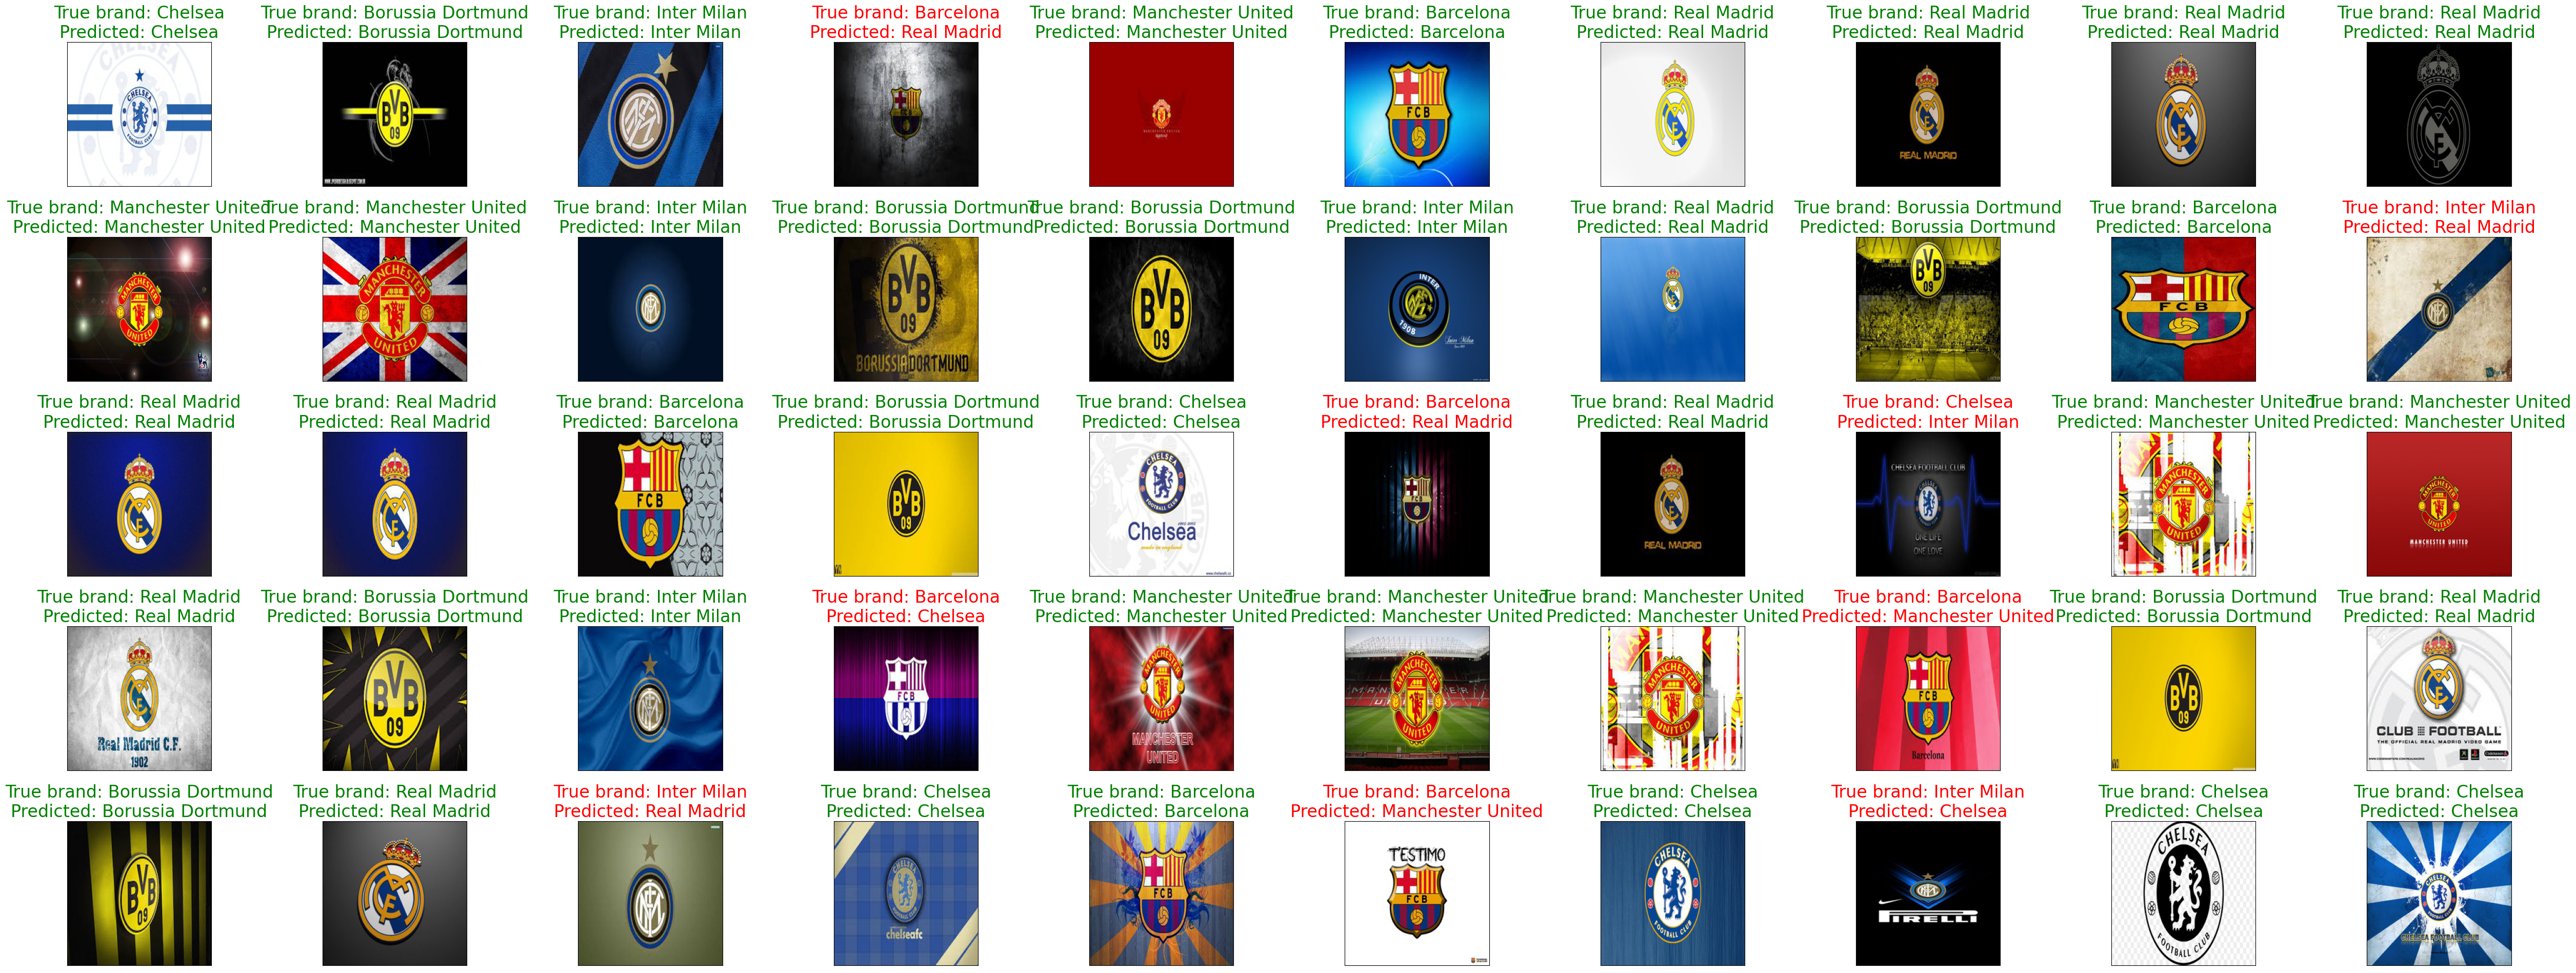

In [84]:
ShowCase(10, 5)